# Name: Abhishek kothari
# Homework 1
# USML

## Question1)

In [2]:
with open("acm.txt",'r') as file:
    content = file.read()

In [3]:

records = content.split("#*")[1:]
parsed_df = []

for record in records:
    
    lines = record.strip().split("\n")
    publications = lines[0].strip()  
    authors = []
    year = None
    publication_venue = None
    citations = []
    index = None

    for line in lines[1:]:
        if line.startswith("#@"):
            authors = [author.strip() for author in line[2:].split(',')]
        elif line.startswith("#t"):
            year = int(line[2:].strip())
        elif line.startswith("#c"):
            publication_venue = line[2:].strip()
        elif line.startswith("#%"):
            citations.append(line[2:].strip())
        elif line.startswith("#index"):
            index = line[6:].strip()
    
    parsed_df.append({
        "publication": publications,
        "authors": authors,
        "year": year,
        "publication_venue": publication_venue,
        "citations": citations,
        "index": index
    })

for data in parsed_df[:5]:
    print(data)

{'publication': 'MOSFET table look-up models for circuit simulation', 'authors': [], 'year': 1984, 'publication_venue': 'Integration, the VLSI Journal', 'citations': [], 'index': '1'}
{'publication': 'The verification of the protection mechanisms of high-level language machines', 'authors': ['Virgil D. Gligor'], 'year': 1984, 'publication_venue': 'International Journal of Parallel Programming', 'citations': [], 'index': '2'}
{'publication': 'Another view of functional and multivalued dependencies in the relational database model', 'authors': ['M. Gyssens', 'J. Paredaens'], 'year': 1984, 'publication_venue': 'International Journal of Parallel Programming', 'citations': [], 'index': '3'}
{'publication': 'Entity-relationship diagrams which are in BCNF', 'authors': ['Sushil Jajodia', 'Peter A. Ng', 'Frederick N. Springsteel'], 'year': 1984, 'publication_venue': 'International Journal of Parallel Programming', 'citations': [], 'index': '4'}
{'publication': 'The computer comes of age', 'auth

In [4]:
import pandas as pd

In [5]:
df1 = pd.DataFrame(parsed_df)
df1.head()

,publication,authors,year,publication_venue,citations,index
0,MOSFET table look-up models for circuit simula...,[],1984.0,"Integration, the VLSI Journal",[],1
1,The verification of the protection mechanisms ...,[Virgil D. Gligor],1984.0,International Journal of Parallel Programming,[],2
2,Another view of functional and multivalued dep...,"[M. Gyssens, J. Paredaens]",1984.0,International Journal of Parallel Programming,[],3
3,Entity-relationship diagrams which are in BCNF,"[Sushil Jajodia, Peter A. Ng, Frederick N. Spr...",1984.0,International Journal of Parallel Programming,[],4
4,The computer comes of age,[Rene Moreau],1984.0,The computer comes of age,[],5


In [6]:

df1['citation_count'] = df1['citations'].apply(lambda x: len(x) if x != "N/A" else 0)

In [7]:
df1.head()

,publication,authors,year,publication_venue,citations,index,citation_count
0,MOSFET table look-up models for circuit simula...,[],1984.0,"Integration, the VLSI Journal",[],1,0
1,The verification of the protection mechanisms ...,[Virgil D. Gligor],1984.0,International Journal of Parallel Programming,[],2,0
2,Another view of functional and multivalued dep...,"[M. Gyssens, J. Paredaens]",1984.0,International Journal of Parallel Programming,[],3,0
3,Entity-relationship diagrams which are in BCNF,"[Sushil Jajodia, Peter A. Ng, Frederick N. Spr...",1984.0,International Journal of Parallel Programming,[],4,0
4,The computer comes of age,[Rene Moreau],1984.0,The computer comes of age,[],5,0


In [15]:
df1 = pd.read_csv("aminer_parsed.csv")

Question A)

In [14]:
distinct_authors = df1['authors'].explode().nunique()
distinct_citations = df1['citations'].explode().nunique()
distinct_venues = df1['publication_venue'].nunique()
distinct_publications = df1['publication'].nunique()

In [16]:
print(f"The number of distinct Authors are: {distinct_authors}")

The number of distinct Authors are: 1651564


In [18]:
print(f"The number of distinct citations are: {distinct_citations}")

The number of distinct citations are: 1007495


In [20]:
print(f"The number of distinct venues are: {distinct_venues}")

The number of distinct venues are: 273329


In [22]:
print(f"The number of distinct publications are: {distinct_publications}")

The number of distinct publications are: 2183552


Question B)

In [25]:
associated_venues = df1[df1['publication_venue'].str.contains("Principles and Practice of Knowledge Discovery in Databases", na=False)]
associated_venues['publication_venue']

799594     PKDD '04 Proceedings of the 8th European Confe...
799731     PKDD '04 Proceedings of the 8th European Confe...
799732     PKDD '04 Proceedings of the 8th European Confe...
799733     PKDD '04 Proceedings of the 8th European Confe...
799734     PKDD '04 Proceedings of the 8th European Confe...
                                 ...                        
1673597    PKDD'05 Proceedings of the 9th European confer...
1673598    PKDD'05 Proceedings of the 9th European confer...
1673599    PKDD'05 Proceedings of the 9th European confer...
1673600    PKDD'05 Proceedings of the 9th European confer...
1673601    PKDD'05 Proceedings of the 9th European confer...
Name: publication_venue, Length: 212, dtype: object

The numbers observed in Question A may not be entirely accurate because the publication venue column contains inconsistencies in formatting. For example, some venue names include the year directly attached, while others do not, and there are variations in spacing. Similarly, author names may sometimes be recorded using initials instead of full names, further contributing to inconsistencies. These formatting issues, along with other potential discrepancies, could lead to inaccuracies in the data.

Question C)

In [29]:
import matplotlib.pyplot as plt

In [31]:
df_authors = df1.explode('authors')
df_authors = df_authors[df_authors['authors'] != "N/A"]
no_publications = df_authors.groupby('authors').size()

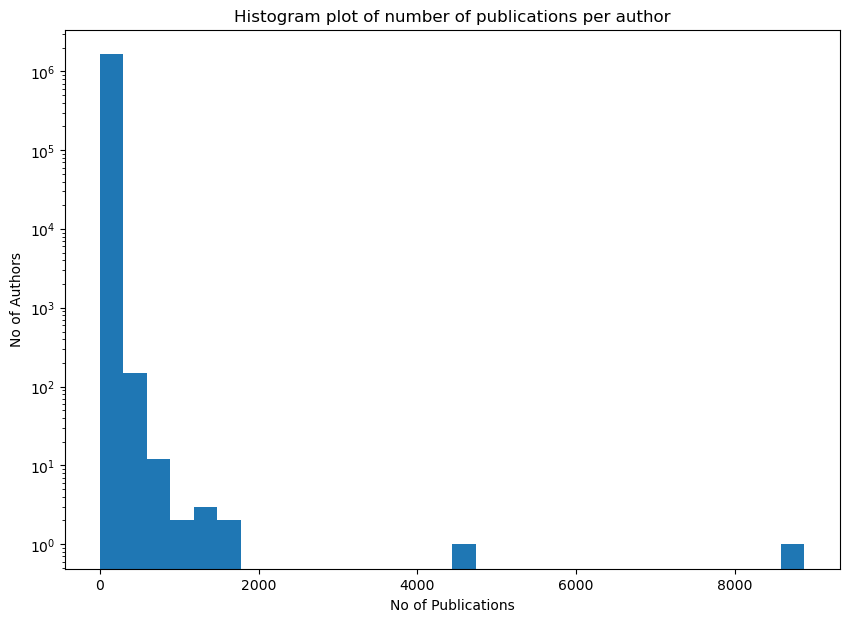

In [32]:
plt.figure(figsize = (10,7))
plt.hist(no_publications,bins=30)
plt.yscale('log')
plt.title("Histogram plot of number of publications per author")
plt.xlabel("No of Publications")
plt.ylabel("No of Authors")
plt.show()


Question D)

In [36]:
mean_publication = no_publications.mean()
std_dev_publication = no_publications.std()
Q1_publication = no_publications.quantile(0.25)
Q2_publication = no_publications.quantile(0.5)
Q3_publication = no_publications.quantile(0.75)

print(f"The mean of the number of publications is: {mean_publication}")
print(f"The standard deviation of the number of publications is: {std_dev_publication}")
print(f"The first quartile of the number of publications is: {Q1_publication}")
print(f"The second quartile (median) of the number of publications is: {Q2_publication}")
print(f"The third quartile of the number of publications is: {Q3_publication}")

The mean of the number of publications is: 3.4625936385147655
The standard deviation of the number of publications is: 12.772606318707094
The first quartile of the number of publications is: 1.0
The second quartile (median) of the number of publications is: 1.0
The third quartile of the number of publications is: 3.0


The mean is much larger than the median, suggesting that the data distribution for the number of publications per author is right-skewed. This means that a large number of authors have a lower number of publications, and only a few authors have a significantly higher number of publications. The large standard deviation also confirms our hypothesis that there is a large spread in the distribution of the data. 
- The value Q1 = 1 suggests that 25% of authors have 1 publication.
- The value Q2 = 1 suggests that 50% (median) of the authors have 1 publication.
- The value Q3 = 3 suggests that 75% of authors have 3 or less than 3 publications.
- The median for the distribution is low as it is less affected by the outliers (authors with high number of publications)

Question E)

In [40]:
venue_counts = df1['publication_venue'].value_counts()

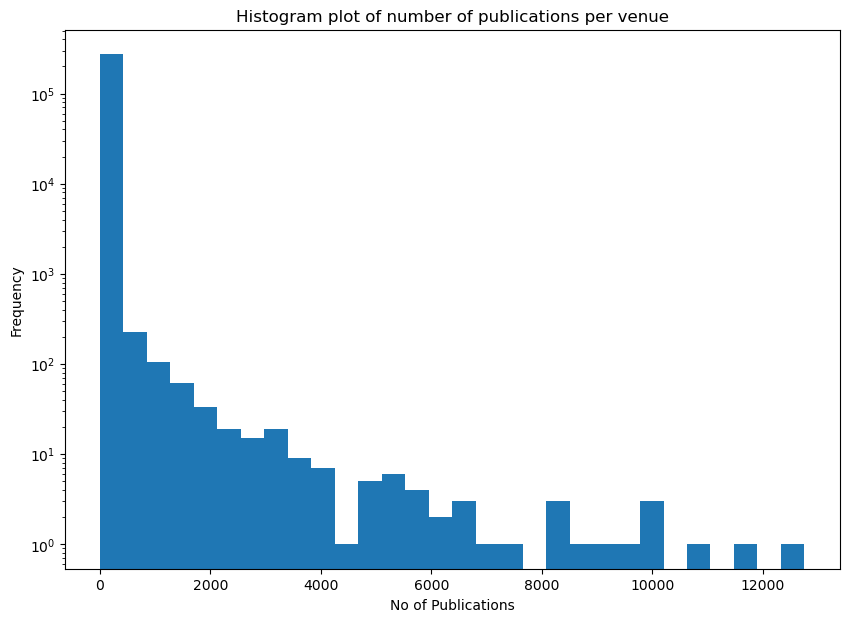

In [42]:
plt.figure(figsize = (10,7))
plt.hist(venue_counts, bins = 30)
plt.yscale('log')
plt.title("Histogram plot of number of publications per venue")
plt.xlabel("No of Publications")
plt.ylabel("Frequency")
plt.show()

In [44]:
mean_venue = venue_counts.mean()
std_venue = venue_counts.std()
median_venue = venue_counts.median()
q1_venue = venue_counts.quantile(0.25)
q3_venue = venue_counts.quantile(0.75)

In [46]:
print(f"The mean of number of publications per venue is: {mean_venue}")
print(f"The standard deviation of number of publications per venue is: {std_venue}")
print(f"The median of number of publications per venue is: {median_venue}")
print(f"The Q1 of number of publications per venue is: {q1_venue}")
print(f"The Q3 of number of publications per venue is: {q3_venue}")

The mean of number of publications per venue is: 8.725323694156128
The standard deviation of number of publications per venue is: 106.78885738942793
The median of number of publications per venue is: 1.0
The Q1 of number of publications per venue is: 1.0
The Q3 of number of publications per venue is: 1.0


Here as well, we can observe that the mean is much larger than the median, suggesting that the data distribution is right-skewed. The stddev is also very high, suggesting that the data is wide spread, but these are very high as a few venues are having a significantly larger number of publications. 

In [49]:
max_venue = venue_counts.idxmax()
no_max = venue_counts.max()

In [51]:
print(f"The venue with most number of publications is {max_venue} and it has around {no_max} number of publications")

The venue with most number of publications is IEEE Transactions on Information Theory and it has around 12754 number of publications


Question F)

In [54]:
df1["references_count"] = 0
citation_map = {}
for index, citations in zip(df1["index"], df1["citations"]):
    for citation in citations:
        citation_map[citation] = citation_map.get(citation,0)+1

df1["references_by_count"] = df1['index'].apply(lambda x: citation_map.get(x,0))


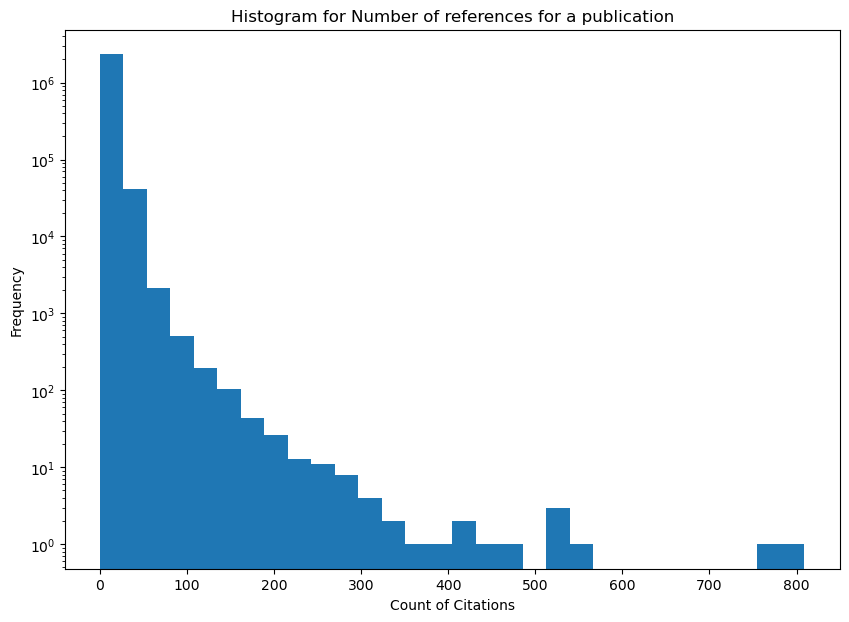

In [55]:
plt.figure(figsize = (10,7))
plt.title("Histogram for Number of references for a publication")
plt.hist(df1['citation_count'], bins = 30)
plt.yscale("log")
plt.xlabel("Count of Citations")
plt.ylabel("Frequency")
plt.show()


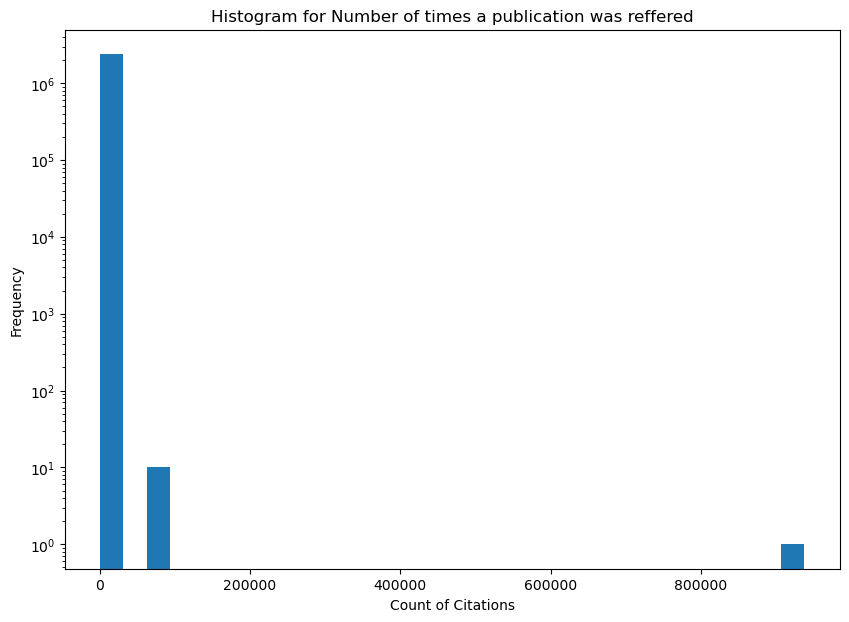

In [64]:
plt.figure(figsize = (10,7))
plt.title("Histogram for Number of times a publication was reffered")
plt.hist(df1['references_by_count'], bins = 30)
plt.yscale("log")
plt.xlabel("Count of Citations")
plt.ylabel("Frequency")
plt.show()


In [66]:
max_references = df1['citation_count'].max()
max_ref_publication = df1[df1["citation_count"] == max_references]

In [68]:
max_ref_publication["publication"]

2015194    Proceedings of the Twenty-Fourth ACM Symposium...
Name: publication, dtype: object

In [70]:
max_references_by = df1['references_by_count'].max()
max_ref_by_publication = df1[df1["references_by_count"] == max_references_by]

In [72]:
max_ref_by_publication["publication"]

2134956    INFORMS Journal on Computing
Name: publication, dtype: object

In [74]:
print(f"The journal which has referenced most number of publications is: {max_ref_publication["publication"]}")
print(f"The Journal which was references by other publications most number of times is: {max_ref_by_publication["publication"]}")

The journal which has referenced most number of publications is: 2015194    Proceedings of the Twenty-Fourth ACM Symposium...
Name: publication, dtype: object
The Journal which was references by other publications most number of times is: 2134956    INFORMS Journal on Computing
Name: publication, dtype: object


For me, based on what I have seen, it makes sense because a journal like ACM using so many references makes sense to me. On the other hand, an informs journal may be something like foundational research, thus being referenced so many times.

Question G)

In [78]:
venue_stats = df1.groupby('publication_venue').agg(total_citations = ('citation_count','sum'), publication_count = ('publication','count')).reset_index()

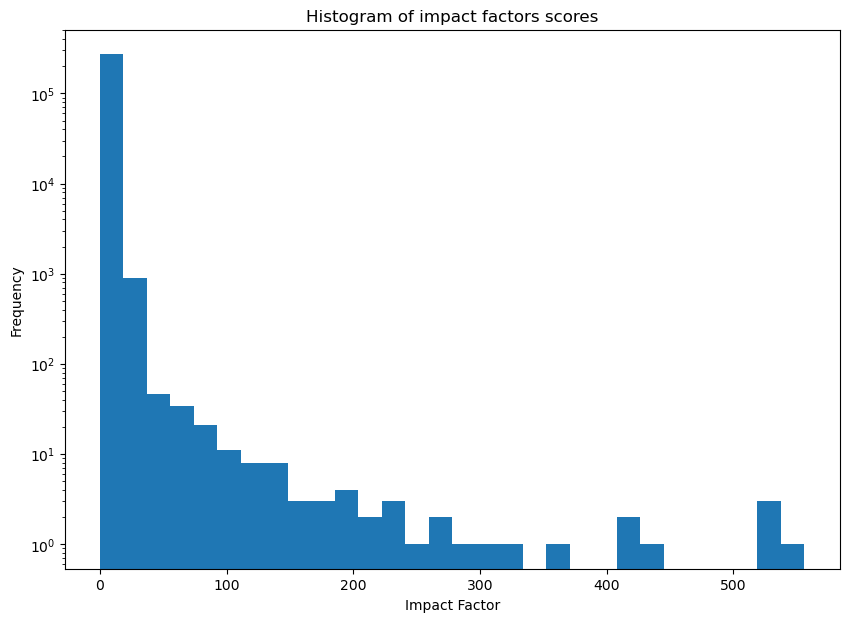

In [80]:
venue_stats["impact_factor"] = venue_stats["total_citations"]/venue_stats["publication_count"]

plt.figure(figsize=(10, 7))
plt.yscale("log")
plt.hist(venue_stats["impact_factor"], bins=30)
plt.title("Histogram of impact factors scores")
plt.xlabel("Impact Factor")
plt.ylabel("Frequency")
plt.show()

Question H)

In [83]:
highest_impact_venue = venue_stats.loc[venue_stats['impact_factor'].idxmax()]


In [85]:
print(f"The venue with the highest impact factor score is: {highest_impact_venue}")

The venue with the highest impact factor score is: publication_venue    System-on-Chip Test Architectures: Nanometer D...
total_citations                                                    556
publication_count                                                    1
impact_factor                                                    556.0
Name: 231737, dtype: object


In [87]:
venue_stats.drop('impact_factor',axis=1,inplace = True)

I think this impact factor is not a valid one, as from the given reference, a very good impact score is considered around 20, but in our case, it is a ridiculously high number, which has to be incorrect.

Question I)

In [89]:
venue_stats_new = venue_stats[venue_stats['publication_count'] >= 10]
venue_stats_new['impact_factor'] = venue_stats_new['total_citations']/venue_stats_new['publication_count']

/var/folders/lq/w3949rrj5b9gxkllt0m0pjcm0000gn/T/ipykernel_1723/1194144205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_stats_new['impact_factor'] = venue_stats_new['total_citations']/venue_stats_new['publication_count']


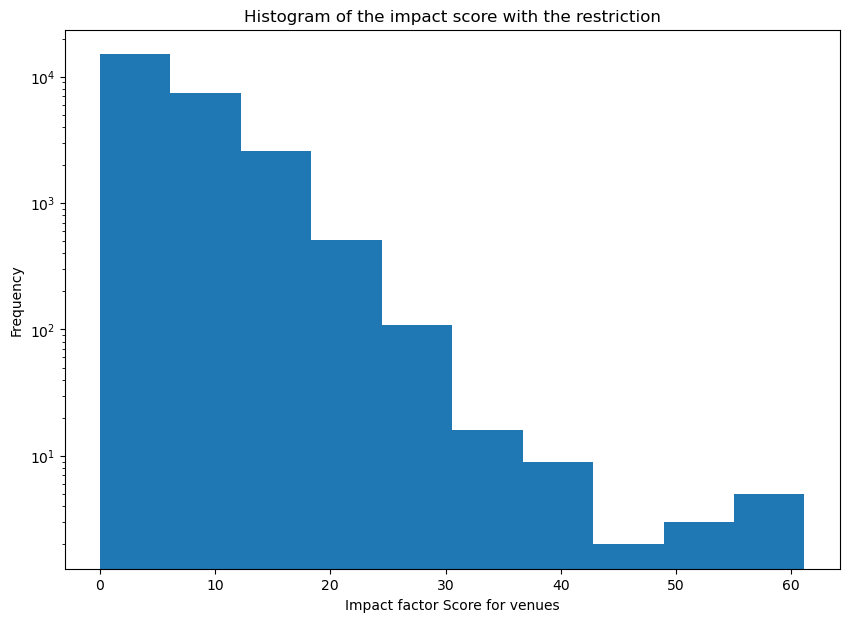

In [91]:
plt.figure(figsize = (10,7))
plt.title("Histogram of the impact score with the restriction")
plt.hist(venue_stats_new["impact_factor"])
plt.yscale("log")
plt.xlabel("Impact factor Score for venues")
plt.ylabel("Frequency")
plt.show()

The histogram after the restrictions is much more well distributed and also has more number of publications towards the higher impact factor score area. This suggests that by imposing the restrictions, we have essentially removed the error of low publication number venues distorting the values of our impact factor score.

In [94]:
highest_publication_venue_new = venue_stats_new.loc[venue_stats_new['impact_factor'].idxmax()]
highest_venue_name = highest_publication_venue_new.publication_venue

In [96]:
highest_venue_citations = df1[df1['publication_venue'] == highest_venue_name]['citation_count']

In [98]:
print(f"The venue with the highest impact factor is {highest_venue_name} with \n {highest_venue_citations} number of citations")

The venue with the highest impact factor is A 25-year perspective on logic programming with 
 1488863      4
1488864     38
1488865     59
1488866     84
1488867     70
1488868     41
1488869     66
1488870    105
1488871     80
1488872    103
1488873     47
1488874     38
1488875     51
1488876     70
Name: citation_count, dtype: int64 number of citations


In [100]:
mean_citations = highest_venue_citations.mean()
median_citations = highest_venue_citations.median()

In [102]:
print(f"Impact factor (mean number of citations): {mean_citations}")
print(f"Median number of citations: {median_citations}")

Impact factor (mean number of citations): 61.142857142857146
Median number of citations: 62.5


As we can see from the above statement, both the mean and median are pretty similar to each other, suggesting that the data distribution for the number of citations for this venue is pretty symetric. While the slightly higher median indicates that there are a few publications that have a smaller number of citations, which ends up pulling the mean down.

Question J)

In [106]:
yearly_stats = df1.groupby("year").agg(avg_references = ('citation_count','mean'), avg_citations_by = ('references_by_count','mean')).reset_index()

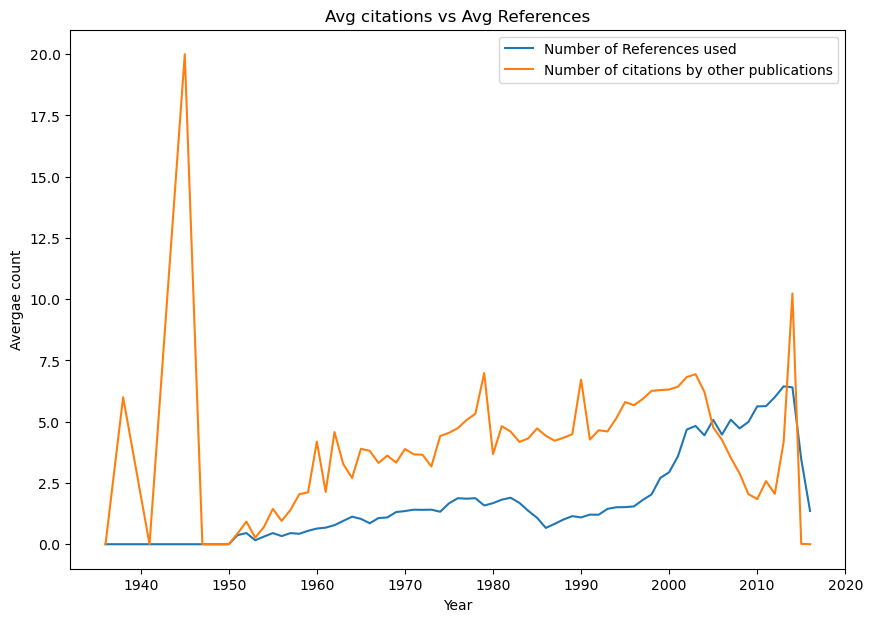

In [108]:
plt.figure(figsize = (10,7))
plt.plot(yearly_stats['year'],yearly_stats['avg_references'], label = "Number of References used")
plt.plot(yearly_stats['year'], yearly_stats['avg_citations_by'], label = "Number of citations by other publications")
plt.title("Avg citations vs Avg References")
plt.xlabel("Year")
plt.ylabel("Avergae count")
plt.legend()
plt.show()

The observations from this plot diagram are that between the years 1940-1950 there was a significant rise in the number of citations for a particular journal. We can get more insights after finding out which this particular publication is. Other than that, both of these averages follow a certain pattern till the year 2000. During the year 2010, we see a drop in the number of publications referenced, maybe showing insights that there was not a very good publication from this venue during that period. In contrast to this, there was a sudden spike during 2015 again because of some famous foundational research publications. For the references chart, we can see it follows a progressive chart, but after 2015, it sees a sharp drop, maybe because there were few journals/publications published after that.

## Question 2

Task A)

In [112]:
import os

In [6]:
def convert_to_sparse_arff(input_file, output_file='kosarak.arff'):
    unique_items = set()
    transaction_count = 0

    with open(input_file, 'r') as f:
        for line in f:
            items = line.strip().split()
            cleaned_items = [item.strip() for item in items if item.strip()]
            unique_items.update(cleaned_items)
            transaction_count += 1
    
    print(f"Found {len(unique_items)} unique items across {transaction_count} transactions")
    
    sorted_items = sorted(unique_items)
    
    with open(output_file, 'w') as out_f:
        out_f.write("% Converted transaction data for Weka association rule mining\n")
        out_f.write("@RELATION kosarak\n\n")
        for item in sorted_items:
            attr_name = f"item_{item}"
            out_f.write(f"@ATTRIBUTE {attr_name} {{0,1}}\n")
        out_f.write("\n")
        out_f.write("@DATA\n")
        
        with open(input_file, 'r') as in_f:
            for line_num, line in enumerate(in_f, 1):
                items = line.strip().split()
                cleaned_items = [item.strip() for item in items if item.strip()]
                sparse_dict = {}
                for item in cleaned_items:
                    item_index = sorted_items.index(item)
                    sparse_dict[item_index] = 1
            
                sorted_indices = sorted(sparse_dict.keys())
                sparse_entries = [f"{idx} 1" for idx in sorted_indices]
            
                if sparse_entries:
                    out_f.write(f"{{{', '.join(sparse_entries)}}}\n")
                else:
                    out_f.write("{}\n")
            
    
    print(f"\nConversion complete! ARFF file saved as: {output_file}")
    return True

def process_file(input_path):
    try:
        convert_to_sparse_arff(input_path)
        return True
    except Exception as e:
        print(f"Error during conversion: {str(e)}")
        return False

Task B)

In [9]:
import time

start_time = time.time()
process_file("kosarak.dat.txt")
end_time = time.time()

print(f"Time taken to convert: {end_time - start_time:.2f} seconds")

Found 41270 unique items across 990002 transactions

Conversion complete! ARFF file saved as: kosarak.arff
Time taken to convert: 882.11 seconds


Task C)

In [ ]:
# it took me around a few seconds to load the file into the weka explorer

Task D) & Task E): I have added screenshots from the weka explorer. 


From the log, the time required for running the algorithm on weka was significantly lower than the time required for converting the dataset as we can confirm from the above timings. 

## Question 3)

In [4]:
# fetching the 20NG dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

Task 1)

In [7]:
ng_train = fetch_20newsgroups(subset = 'train')
ng_test = fetch_20newsgroups(subset = 'test')

In [9]:
print(f"Train data size: {len(ng_train.data)}, Train labels size: {len(ng_train.target)}")
print(f"Test data size: {len(ng_test.data)}, Test labels size: {len(ng_test.target)}")

Train data size: 11314, Train labels size: 11314
Test data size: 7532, Test labels size: 7532


In [37]:
import tensorflow as tf
#detching the mnist data
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [38]:
print(f"Train image size: {train_images.shape}, Train labels size: {train_labels.shape}")
print(f"Test image size: {test_images.shape}, Test labels size: {test_labels.shape}")

Train image size: (60000, 28, 28), Train labels size: (60000,)
Test image size: (10000, 28, 28), Test labels size: (10000,)


Task 2)

In [39]:
#Normalizing the two datasets
# we use shift and scle normalization for the mnist dataset
min_value = train_images.min()
max_value = train_images.max()
train_images = (train_images - min_value)/ (max_value - min_value)
test_images = (test_images - min_value)/ (max_value - min_value)

In [13]:
# now we use the term frequency doc classifier for the 20ng dataset
vectorizer = TfidfVectorizer(stop_words = 'english')
train_vectors = vectorizer.fit_transform(ng_train.data)
test_vectors = vectorizer.transform(ng_test.data)

Task 3)

In [137]:
euc_dist_mnist_lib = euclidean_distances(train_images.reshape(len(train_images),-1))

In [138]:
print(f"Euclidean distance calculated using common library for mnist dataset for the train images is: \n {euc_dist_mnist_lib}")

Euclidean distance calculated using common library for mnist dataset for the train images is: 
 [[ 0.          9.36122213 10.87509456 ...  7.87960053  9.72137721
   9.92404294]
 [ 9.36122213  0.         11.36836434 ... 10.41355474  8.2234303
   9.52073598]
 [10.87509456 11.36836434  0.         ... 10.08277087  9.91083896
   9.51149045]
 ...
 [ 7.87960053 10.41355474 10.08277087 ...  0.          9.34089659
   8.98182367]
 [ 9.72137721  8.2234303   9.91083896 ...  9.34089659  0.
   9.07693123]
 [ 9.92404294  9.52073598  9.51149045 ...  8.98182367  9.07693123
   0.        ]]


In [133]:
# now for ngroup data, as it is a sparse matrix. we use a library from sklearn
from sklearn.metrics.pairwise import euclidean_distances
euc_dist_ng_lib = euclidean_distances(train_vectors)
print(f"The euclidean distance for the ng group train vectors using sklearn library is: \n {euc_dist_ng_lib}")

The euclidean distance for the ng group train vectors using scipy library is: 
 [[0.         1.40347531 1.39037341 ... 1.41183503 1.40917033 1.39682712]
 [1.40347531 0.         1.39618941 ... 1.37371916 1.3746041  1.40022341]
 [1.39037341 1.39618941 0.         ... 1.41216401 1.40412671 1.40511505]
 ...
 [1.41183503 1.37371916 1.41216401 ... 0.         1.41247939 1.41366113]
 [1.40917033 1.3746041  1.40412671 ... 1.41247939 0.         1.41025883]
 [1.39682712 1.40022341 1.40511505 ... 1.41366113 1.41025883 0.        ]]


In [176]:
# now we move towards calculating euclidean distance using a custom implementation
import numpy as np
def compute_euc_dist_batches(x, batch_size):
    n_samples = x.shape[0]
    dist_matrix = np.zeros((n_samples,n_samples))

    for start_idx in range(0, n_samples, batch_size):
        end_idx = min(start_idx + batch_size, n_samples)
        batch = x[start_idx:end_idx]

        dist = np.sqrt(((batch[:, None, :] - x[None, :, :]) ** 2).sum(axis=2))
        dist_matrix[start_idx:end_idx,:] = dist
    return dist_matrix

In [20]:
train_images_flat = train_images.reshape(len(train_images),-1)

In [22]:
train_images_flat.shape

(60000, 784)

In [24]:
train_images_flat = train_images_flat[:20000,:]

In [143]:
batch_size = 150
custom_euc_dist_mnist = compute_euc_dist_batches(train_images_flat, batch_size)
print(f"Custom euclidean distance for mnist dataset is: {custom_euc_dist_mnist}")

Custom euclidean distance for mnist dataset is: [[ 0.          9.36122213 10.87509456 ...  9.1229527  10.77111206
  11.64063664]
 [ 9.36122213  0.         11.36836434 ... 11.21603181 10.83128878
  12.25583181]
 [10.87509456 11.36836434  0.         ... 10.36176837 10.14268524
  12.01659432]
 ...
 [ 9.1229527  11.21603181 10.36176837 ...  0.          8.58526406
  10.83615561]
 [10.77111206 10.83128878 10.14268524 ...  8.58526406  0.
  10.0040507 ]
 [11.64063664 12.25583181 12.01659432 ... 10.83615561 10.0040507
   0.        ]]


In [27]:
def compute_euclidean_distance_sparse_subset(X):
    n_samples = X.shape[0]
    dist_matrix = np.zeros((n_samples, n_samples))
    
    for i in range(n_samples):
        row = X[i]
        squared_distances = X.power(2).sum(axis=1) - 2 * X @ row.T + row.power(2).sum()
        clipped_distances = np.clip(squared_distances, 0, None) 
        distances = np.sqrt(clipped_distances)
        
        dist_matrix[i, :] = np.ravel(distances)  
    
    return dist_matrix

In [31]:

dist_matrix_subset = compute_euclidean_distance_sparse_subset(train_vectors)
print(f"The euclidean distance with custom calculation for ng group data subset is: {dist_matrix_subset}")

The euclidean distance with custom calculation for ng group data subset is: [[1.49011612e-08 1.40347531e+00 1.39037341e+00 ... 1.41183503e+00
  1.40917033e+00 1.39682712e+00]
 [1.40347531e+00 1.05367121e-08 1.39618941e+00 ... 1.37371916e+00
  1.37460410e+00 1.40022341e+00]
 [1.39037341e+00 1.39618941e+00 0.00000000e+00 ... 1.41216401e+00
  1.40412671e+00 1.40511505e+00]
 ...
 [1.41183503e+00 1.37371916e+00 1.41216401e+00 ... 0.00000000e+00
  1.41247939e+00 1.41366113e+00]
 [1.40917033e+00 1.37460410e+00 1.40412671e+00 ... 1.41247939e+00
  0.00000000e+00 1.41025883e+00]
 [1.39682712e+00 1.40022341e+00 1.40511505e+00 ... 1.41366113e+00
  1.41025883e+00 0.00000000e+00]]


In [26]:
# now we move on to calculate the cosine similarity between the image vectors
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_mnist = cosine_similarity(train_images_flat)
print(f"The cosine similarity for the mnist train images is: {cos_sim_mnist}")

The cosine similarity for the mnist train images is: [[1.         0.55210019 0.21982848 ... 0.46181576 0.29916503 0.33748691]
 [0.55210019 1.         0.21570934 ... 0.24340303 0.34439987 0.30622869]
 [0.21982848 0.21570934 1.         ... 0.10429777 0.22822468 0.16821179]
 ...
 [0.46181576 0.24340303 0.10429777 ... 1.         0.45374023 0.33768303]
 [0.29916503 0.34439987 0.22822468 ... 0.45374023 1.         0.47348762]
 [0.33748691 0.30622869 0.16821179 ... 0.33768303 0.47348762 1.        ]]


In [34]:
cos_sim_ng = cosine_similarity(train_vectors_new)
print(f"The cosine similarity for the ng group data is: {cos_sim_ng}")

The cosine similarity for the ng group data is: [[1.         0.01512853 0.03343088 ... 0.11932746 0.02502903 0.01245092]
 [0.01512853 1.         0.02532757 ... 0.00168582 0.01289457 0.00217529]
 [0.03343088 0.02532757 1.         ... 0.00922215 0.0134951  0.01475594]
 ...
 [0.11932746 0.00168582 0.00922215 ... 1.         0.00435098 0.0501984 ]
 [0.02502903 0.01289457 0.0134951  ... 0.00435098 1.         0.00265199]
 [0.01245092 0.00217529 0.01475594 ... 0.0501984  0.00265199 1.        ]]


## Problem 4

In [48]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [50]:
train_vectors_dense = train_vectors.toarray()
test_vectors_dense = test_vectors.toarray()

In [68]:
from collections import Counter
import numpy as np

class CustomKNN:
    def __init__(self, k=5):
        self.k = k  

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = []
            for i in range(len(self.X_train)):
                dist = self.euclidean_distance(test_point, self.X_train[i]) 
                distances.append((dist, self.y_train[i]))

            distances.sort(key=lambda x: x[0]) 
            neighbors = distances[:self.k]  

            neighbor_labels = [label for _, label in neighbors]
            most_common = Counter(neighbor_labels).most_common(1) 
            predictions.append(most_common[0][0])

        return predictions

In [80]:
from sklearn.model_selection import train_test_split
# for mnist data
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [84]:
test_images.shape

(10000, 28, 28)

In [86]:
knn = CustomKNN(k=5)
knn.fit(x_train, y_train)

In [88]:
y_pred_val = knn.predict(x_val)

In [94]:
accuracy = np.mean(np.array(y_pred_val) == y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 97.34%


In [98]:
y_pred = knn.predict(test_images)

In [103]:
accuracy_test = np.mean(np.array(y_pred) == test_labels)
print(f"Testing Accuracy is: {accuracy_test * 100:.2f}%")

Testing Accuracy is: 96.79%


In [170]:
#we needed to create another knn class in order to handle the sparse nature of the ng group vectors
from collections import Counter
import numpy as np

class CustomKNN2:
    def __init__(self, k=5):
        self.k = k  

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
        
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = []
            for i in range(self.X_train.shape[0]):  
                dist = self.euclidean_distance(test_point.toarray(), self.X_train[i].toarray()) 
                distances.append((dist, self.y_train[i]))  

            distances.sort(key=lambda x: x[0])
            neighbors = distances[:self.k]

            neighbor_labels = [label for _, label in neighbors]
            most_common = Counter(neighbor_labels).most_common(1)
            predictions.append(most_common[0][0])

        return predictions

In [111]:
# now lets move towards the ng group dataset
#test vectors
#ng_train.target
x_train, x_val, y_train, y_val = train_test_split(train_vectors, ng_train.target, test_size = 0.2, random_state = 42)

knn1 = CustomKNN2(k=5)
knn1.fit(x_train, y_train)

y_pred_ng = knn1.predict(x_val)

accuracy_ng_val = np.mean(np.array(y_pred_ng) == y_val)
print(f"Validation accuracy for ng dataset is: {accuracy_ng_val * 100:.2f}%")

Validation accuracy for ng dataset is: 81.22%


In [172]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_vectors, ng_train.target, test_size = 0.2, random_state = 42)
knn1 = CustomKNN2(k=5)
knn1.fit(x_train,y_train)

In [174]:
import numpy as np
y_pred_test_ng = knn1.predict(test_vectors)
accuracy_test_ng = np.mean(np.array(y_pred_test_ng) == ng_test.target)
print(f"Testing Accuracy for ng dataset is: {accuracy_test_ng * 100:.2f}%")

Testing Accuracy for ng dataset is: 68.60%
